In [ ]:
!pip install kaggle
from google.colab import files
files.upload();

Saving kaggle.json to kaggle.json


In [1]:
import os

In [2]:
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [3]:
!kaggle datasets download -d mohidabdulrehman/laptop-price-dataset

Dataset URL: https://www.kaggle.com/datasets/mohidabdulrehman/laptop-price-dataset
License(s): CC0-1.0
  0% 0.00/24.4k [00:00<?, ?B/s]
100% 24.4k/24.4k [00:00<00:00, 27.0MB/s]


In [4]:
!unzip *.zip

Archive:  laptop-price-dataset.zip
  inflating: laptop_data.csv         


In [5]:
! ls

laptop_data.csv  laptop-price-dataset.zip  sample_data


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [7]:
df = pd.read_csv('laptop_data.csv')
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [8]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [10]:
df.drop(columns=['Unnamed: 0','Company','TypeName','ScreenResolution','Cpu','Memory','Gpu','OpSys','Weight'], inplace= True)

In [11]:
df.head()

,Inches,Ram,Price
0,13.3,8GB,71378.6832
1,13.3,8GB,47895.5232
2,15.6,8GB,30636.0000
3,15.4,16GB,135195.3360
4,13.3,8GB,96095.8080


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Inches  1303 non-null   float64
 1   Ram     1303 non-null   object 
 2   Price   1303 non-null   float64
dtypes: float64(2), object(1)
memory usage: 30.7+ KB


In [13]:
df

,Inches,Ram,Price
0,13.3,8GB,71378.6832
1,13.3,8GB,47895.5232
2,15.6,8GB,30636.0000
3,15.4,16GB,135195.3360
4,13.3,8GB,96095.8080
...,...,...,...
1298,14.0,4GB,33992.6400
1299,13.3,16GB,79866.7200
1300,14.0,2GB,12201.1200
1301,15.6,6GB,40705.9200


In [14]:
df['Ram']= df['Ram'].str.replace('GB','')

In [15]:
df.head()

,Inches,Ram,Price
0,13.3,8,71378.6832
1,13.3,8,47895.5232
2,15.6,8,30636.0000
3,15.4,16,135195.3360
4,13.3,8,96095.8080


In [16]:
df['Ram'] = df['Ram'].astype('int')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Inches  1303 non-null   float64
 1   Ram     1303 non-null   int64  
 2   Price   1303 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 30.7 KB


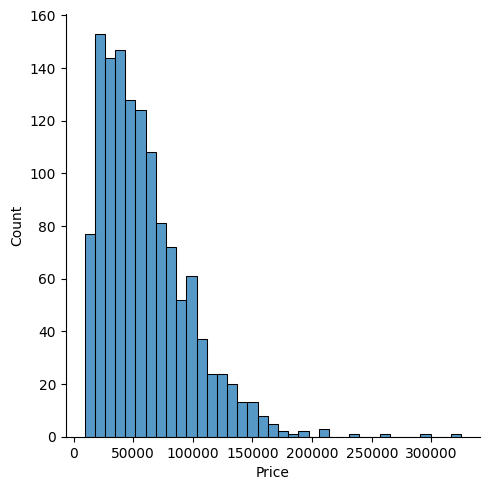

In [18]:
sns.displot(df['Price'])

<ipython-input-19-87e11caeb2c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

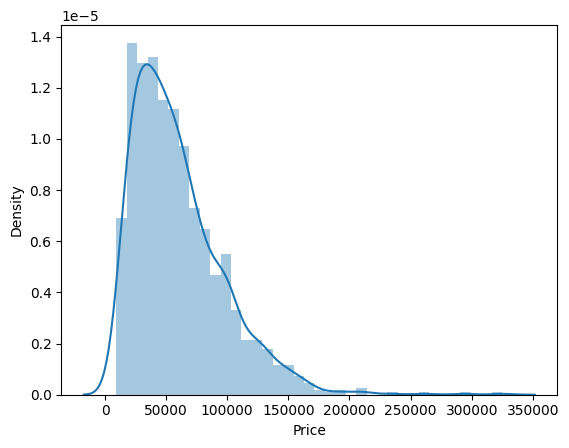

In [ ]:
sns.distplot(df['Price'])

<ipython-input-20-cb592f7051cc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])
<ipython-input-20-cb592f7051cc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ram'])


<Axes: xlabel='Ram', ylabel='Density'>

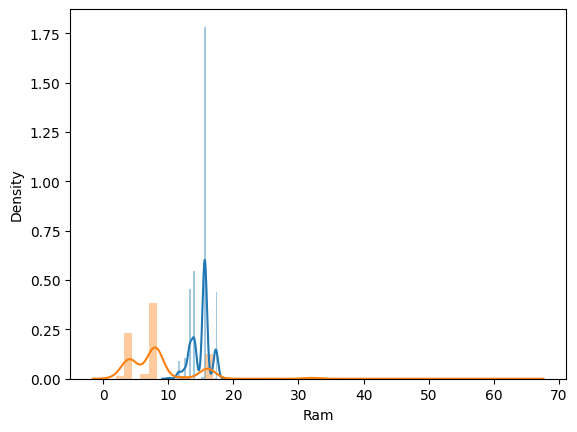

In [ ]:
sns.distplot(df['Inches'])
sns.distplot(df['Ram'])

<ipython-input-21-51888cb550e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

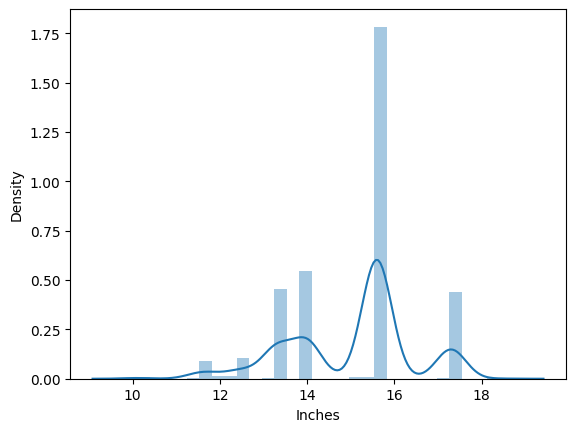

In [ ]:
sns.distplot(df['Inches'])

In [19]:
q = df['Ram'].quantile(0.99)
df_2=df[df['Ram']<q]
df_2.describe(include='all')

,Inches,Ram,Price
count,1285.000000,1285.000000,1285.000000
mean,14.990117,8.026459,58138.086571
std,1.411939,4.036737,33775.306198
min,10.100000,2.000000,9270.720000
25%,14.000000,4.000000,31861.440000
50%,15.600000,8.000000,51095.520000
75%,15.600000,8.000000,78055.200000
max,17.300000,24.000000,233845.920000


In [20]:
data_cleaned= df_2.reset_index(drop=True)
df_2.to_csv('data_cleaned_csv')

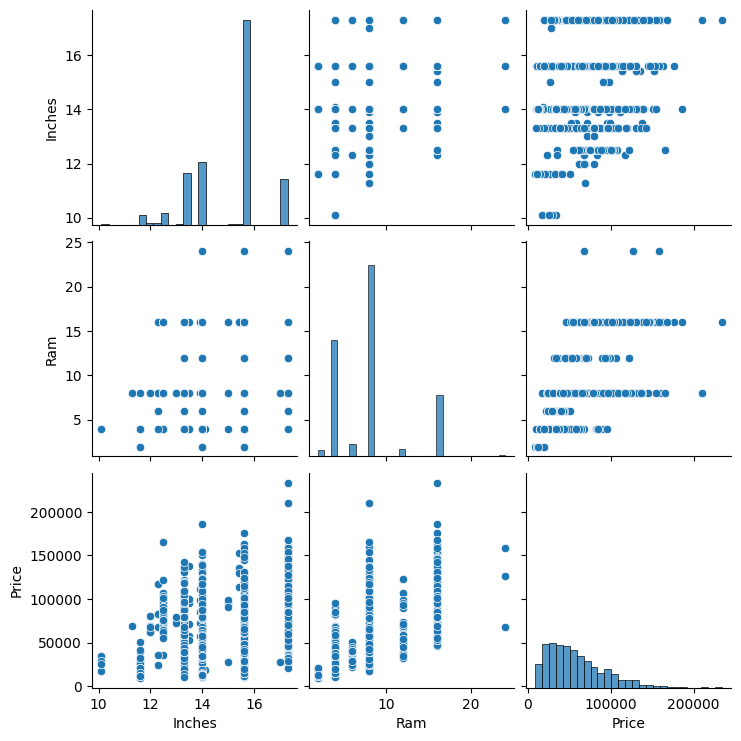

In [ ]:
sns.pairplot(data_cleaned)

In [21]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log price'] = log_price
data_cleaned

,Inches,Ram,Price,log price
0,13.3,8,71378.6832,11.175755
1,13.3,8,47895.5232,10.776777
2,15.6,8,30636.0000,10.329931
3,15.4,16,135195.3360,11.814476
4,13.3,8,96095.8080,11.473101
...,...,...,...,...
1280,14.0,4,33992.6400,10.433899
1281,13.3,16,79866.7200,11.288115
1282,14.0,2,12201.1200,9.409283
1283,15.6,6,40705.9200,10.614129


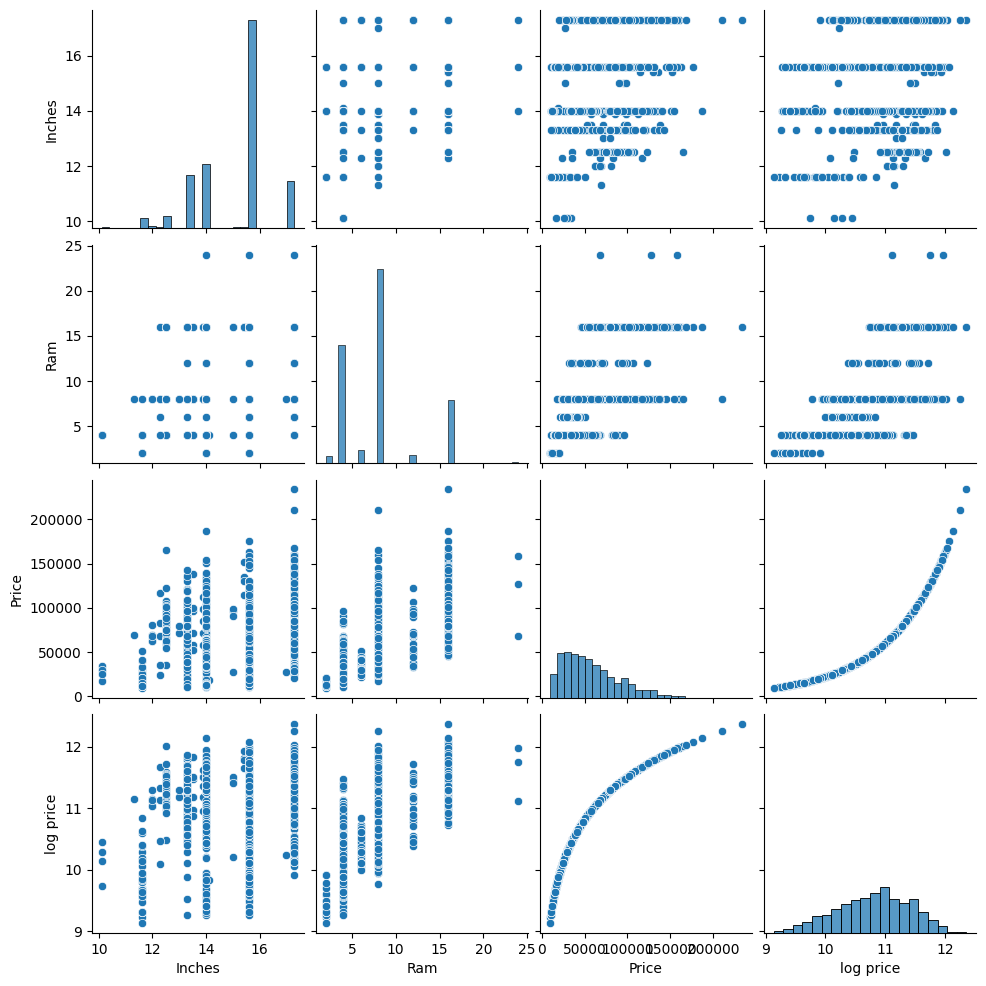

In [ ]:
sns.pairplot(data_cleaned)

In [22]:
#import variance inflation factor dari statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
data_cleaned1 = pd.DataFrame()

In [24]:
data_cleaned1 = pd.read_csv('data_cleaned_csv')

In [25]:
variables = data_cleaned1[['Inches', 'Ram']]

In [26]:
#buat dataframe untuk mempermudah mengamati nilai VIF
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Featurs'] = variables.columns

In [27]:
vif

,VIF,Featurs
0,5.128514,Inches
1,5.128514,Ram


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame


In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
# Separating Independent and dependent variables
X=data_cleaned.drop(['Price','log price'],axis=1)
Y=data_cleaned['log price']

In [30]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Scaler.fit(X)

X_scaled = Scaler.transform(X)

In [31]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

In [32]:
# Create the linear regresion model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
# Get the coefficients
b0 = model.intercept_

In [35]:
#print the coefficients
print("Intercept (bo):", b0)

model_summary = pd.DataFrame(X.columns.values, columns=['Features'])
model_summary['weightd'] = model.coef_
model_summary

Intercept (bo): 10.800452072491204


,Features,weightd
0,Inches,-0.083966
1,Ram,0.469719


In [ ]:
import seaborn as sb

<ipython-input-43-31540c55e48f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
<ipython-input-43-31540c55e48f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Valu

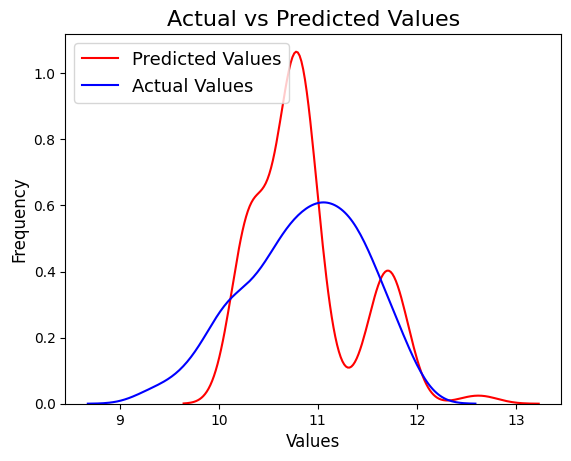

In [ ]:
sb.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sb.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize= 12)
plt.legend(loc = 'upper left', fontsize =13)
plt.savefig('ap.png')

In [57]:
#Evaluasi model yang dibuat
from sklearn.metrics import mean_squared_error, r2_score

#Calculate mean Squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

#Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

Mean Squared Error: 0.1918132724822121
R-squared: 0.4629111454029802


In [42]:
data_cleaned1

,Unnamed: 0,Inches,Ram,Price
0,0,13.3,8,71378.6832
1,1,13.3,8,47895.5232
2,2,15.6,8,30636.0000
3,3,15.4,16,135195.3360
4,4,13.3,8,96095.8080
...,...,...,...,...
1280,1298,14.0,4,33992.6400
1281,1299,13.3,16,79866.7200
1282,1300,14.0,2,12201.1200
1283,1301,15.6,6,40705.9200


In [43]:
data_cleaned1.drop(columns=['Unnamed: 0'], inplace=True)

In [44]:
data_cleaned1

,Inches,Ram,Price
0,13.3,8,71378.6832
1,13.3,8,47895.5232
2,15.6,8,30636.0000
3,15.4,16,135195.3360
4,13.3,8,96095.8080
...,...,...,...
1280,14.0,4,33992.6400
1281,13.3,16,79866.7200
1282,14.0,2,12201.1200
1283,15.6,6,40705.9200


In [46]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Featurs'] = variables.columns
vif

,VIF,Featurs
0,5.128514,Inches
1,5.128514,Ram


In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

score = lr.score(X_test, y_test)
print('akurasi model regresi linnier =', score)

akurasi model regresi linnier = 0.4629111454029802


In [71]:
#Inches=13.3, Ram= 8
input_data = np.array([[13.3, 8]])
prediction = lr.predict(input_data)
print('Estimasi harga laptop dalam Eur : ', prediction)

Estimasi harga laptop dalam Eur :  [13.44145772]


In [72]:
import pickle

filename = 'estimasi_laptop.sav'
pickle.dump(lr, open(filename,'wb'))